In [1]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import random

In [2]:
#load data
import scipy.io
train = scipy.io.loadmat("/kaggle/input/svhndataset/train_32x32.mat")
X_train = train["X"].T  # taking transpose just for visualizing the images funtion
y_train = train["y"]


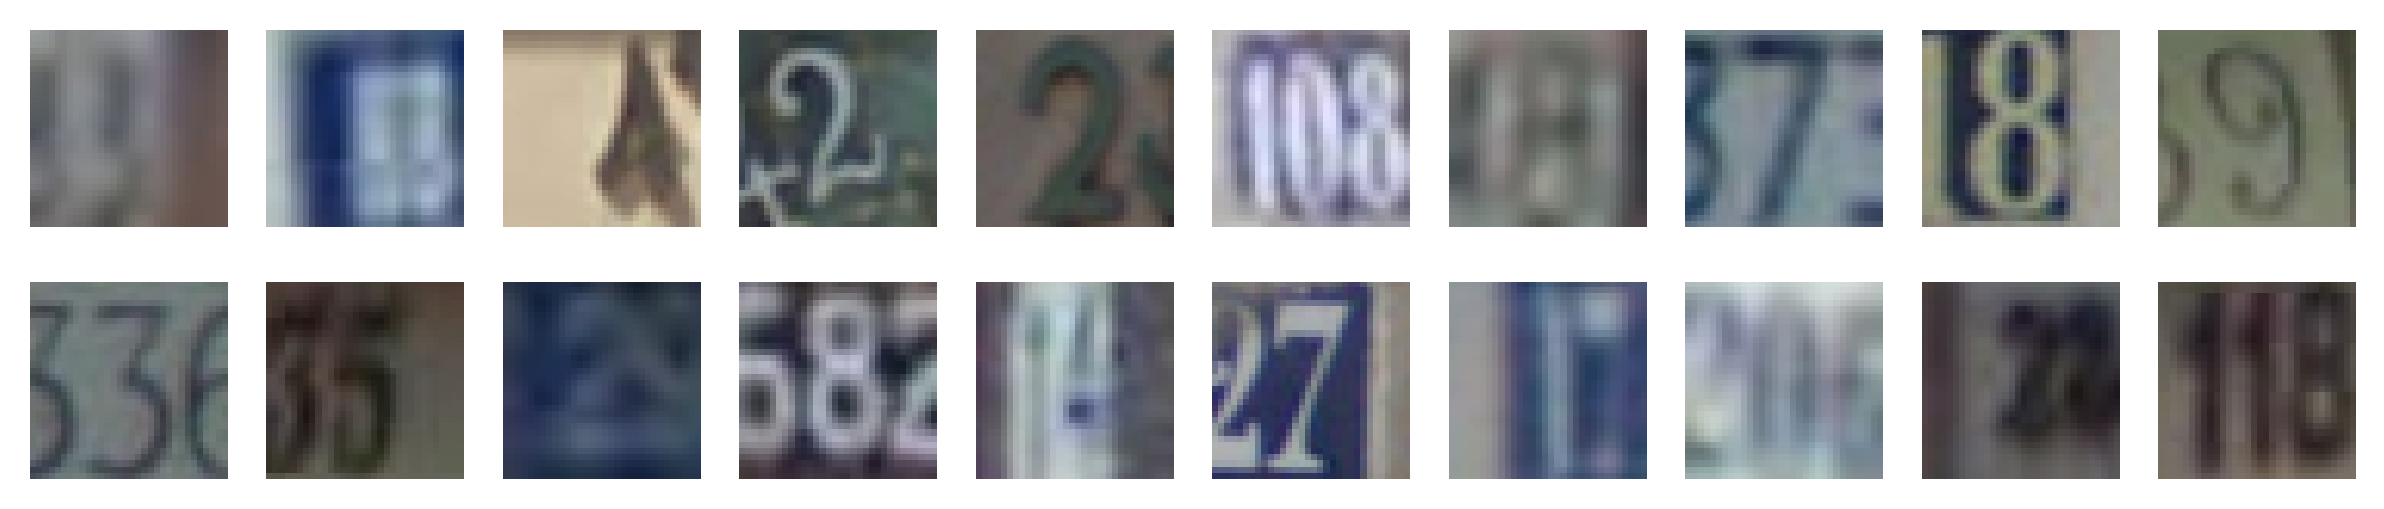

In [6]:
#visualize sample data
figure, axes = plt.subplots(2, 10, figsize = (10, 2), dpi = 300)
for i in range(2):
    for j in range(10):
        axes[i][j].imshow(random.choice(X_train).T)
        axes[i][j].set_axis_off()
plt.show()

# Question 1 

### Part a 

In [7]:
x_train = np.transpose(train['X'], (3,0,1,2))
x_train.shape

(73257, 32, 32, 3)

In [8]:
num_imgs,height,width,channels = x_train.shape
x= np.reshape(x_train,(73257,height*width*channels))

In [9]:
from sklearn.preprocessing import StandardScaler

# Assuming train['X'] is a 4D array representing images
# Reshape it to a 2D array before applying StandardScaler
#num_samples, height, width, channels = x.shape
#X_reshaped = train['X'].reshape(num_samples, height * width * channels)

# Apply StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(x)

In [10]:
## taking subset of 2500 samples each

In [11]:
subset_indices = []
for i in range(10):
    class_indices = np.where(train['y'] == i + 1)[0]  # Use the actual class labels (1 to 10)
    num_samples_in_class = min(2500, len(class_indices))  # Adjust the sample size if needed
    chosen_indices = np.random.choice(class_indices, size=num_samples_in_class, replace=False)
    # choosing images rmndomly
    subset_indices.extend(chosen_indices)

subset_images = X_std[subset_indices]
subset_labels = y_train[subset_indices]

In [12]:
subset_images

array([[-0.08211972, -0.31456462, -0.48700777, ..., -1.01644655,
        -1.24638895, -1.14056556],
       [ 0.57557584,  0.67037242,  0.54699872, ...,  0.62147243,
         0.63377316,  0.67277917],
       [-0.06277574, -0.14409475, -0.58274911, ..., -0.66546391,
        -0.82431174, -0.84491153],
       ...,
       [ 0.24672806,  0.25366829,  0.06829201, ...,  0.36798497,
         0.28843726,  0.12089164],
       [ 0.13066414,  0.27260938,  0.29807123, ...,  1.32343771,
         1.30525962,  1.42176938],
       [ 0.90442362,  0.8219012 ,  0.75762967, ...,  1.10894832,
         1.03666503,  0.85017159]])

#### No of features before performing PCA

In [13]:
num_features_before_pca = x.shape[1]  

print(f"Number of features before PCA: {num_features_before_pca}")

Number of features before PCA: 3072


In [14]:
x.shape

(73257, 3072)

In [15]:
X_std.shape

(73257, 3072)

In [16]:
from sklearn.decomposition import PCA  
   
pca = PCA (0.9)
   
images_post_pca = pca.fit_transform(subset_images)  
#X_test = pca.transform(X_test)  

In [17]:
images_post_pca[1].size

27

In [18]:
images_post_pca.shape

(25000, 27)

In [19]:
# Get the number of features after PCA
num_features_after_pca = pca.n_components_

print(f"Number of features after PCA: {num_features_after_pca}")

Number of features after PCA: 27


In [20]:
# Calculate the cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find how many components are required to keep 90% of the variance
n_components_90 = np.argmax(cumulative_variance > 0.9) + 1

In [21]:
cumulative_variance

array([0.57416604, 0.6337819 , 0.68519567, 0.72404132, 0.74638838,
       0.76452602, 0.78006573, 0.79509594, 0.80775097, 0.81898347,
       0.82816223, 0.83686644, 0.84439928, 0.85036186, 0.85565742,
       0.86073654, 0.8656264 , 0.86996987, 0.87428289, 0.87834511,
       0.88203375, 0.88563167, 0.88911983, 0.89231522, 0.89543968,
       0.89846907, 0.90131359])

In [22]:
required_eigenvectors = n_components_90

In [23]:
eigenvalues = pca.explained_variance_
eigenvectors = pca.components_

In [24]:
eigenvalues.shape

(27,)

In [25]:
eigenvectors.shape

(27, 3072)

In [26]:
eigenvectors_10 = eigenvectors[:10,:]
eigenvectors_10

array([[ 0.01751044,  0.01777952,  0.0185293 , ...,  0.01665664,
         0.01697254,  0.01794238],
       [-0.00545879, -0.00189422,  0.00579461, ..., -0.02810668,
        -0.02666325, -0.01869986],
       [-0.02621006, -0.02487753, -0.01719817, ...,  0.00468774,
         0.00865368,  0.01567396],
       ...,
       [ 0.00683507,  0.00803694,  0.00432072, ..., -0.02590381,
        -0.02490618, -0.01781177],
       [-0.00945425, -0.01002605, -0.00820511, ..., -0.02825602,
        -0.02967875, -0.02764865],
       [ 0.01107545,  0.01141702,  0.0102249 , ..., -0.0113106 ,
        -0.01174299, -0.01274603]])

In [128]:
eigenvectors_10.shape

(10, 3072)

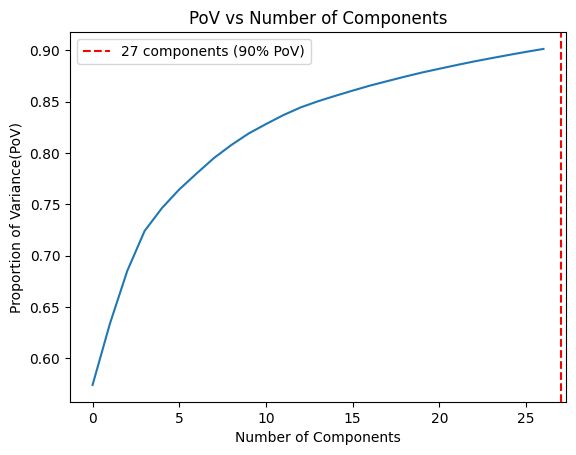

Number of components to retain 90% of variance: 27


In [27]:

# Plotting PoV (Proportion of Variance) against number of components
plt.plot(cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Proportion of Variance(PoV)')
plt.title('PoV vs Number of Components')
plt.axvline(x=n_components_90, color='r', linestyle='--', label=f'{n_components_90} components (90% PoV)')
#plt.figsize()
plt.legend()
plt.show()

print(f"Number of components to retain 90% of variance: {n_components_90}")

### Part b 

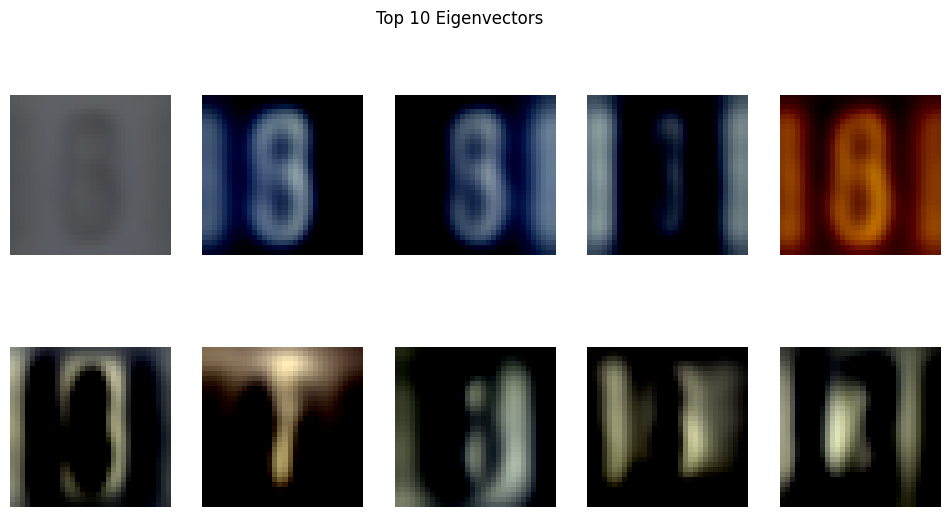

In [28]:
# Visualize Top 10 Eigenvectors
top_10_eigenvectors = pca.components_[:10, :]
top_10_eigenvectors_normalized = top_10_eigenvectors / np.max(top_10_eigenvectors)
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(top_10_eigenvectors_normalized[i].reshape(32, 32, 3),cmap='inferno')
    ax.axis('off')
plt.suptitle('Top 10 Eigenvectors')
plt.show()

## Reconstruction

In [29]:
from sklearn.decomposition import PCA  
   
pca_recon = PCA (n_components = 10)  
   
images_for_rec = pca_recon.fit_transform(subset_images)

In [30]:
# Calculate the cumulative explained variance
cumulative_variance_r = np.cumsum(pca_recon.explained_variance_ratio_)

# Find how many components are required to keep 90% of the variance
#n_components_90 = np.argmax(cumulative_variance > 0.9) + 1
cumulative_variance_r

array([0.57416604, 0.6337819 , 0.68519567, 0.72404132, 0.74638838,
       0.76452602, 0.78006573, 0.79509594, 0.80775097, 0.81898347])

In [31]:
eigenvalues_rec = pca_recon.explained_variance_
eigenvectors_rec = pca_recon.components_

In [32]:
eigenvalues_rec

array([1753.94519796,  182.11273955,  157.05723301,  118.66453572,
         68.26511834,   55.40633432,   47.47023591,   45.91381445,
         38.65822279,   34.31270043])

In [33]:
eigenvectors_rec.shape

(10, 3072)

In [34]:
## taking 10 images  1 from each class 

In [35]:
subset_images.shape

(25000, 3072)

In [36]:
num_classes = 10  # 10 classes
#fig, ax = plt.subplots(1, num_classes, figsize=(15, 5))
list_10 = []
for i in range(num_classes):
    # Find images of the current class
    image_indices = np.where(subset_labels == i+1)[0]
    index = np.random.choice(image_indices,1,replace=False).tolist()
    print(index)
    images_10 = subset_images[index].flatten()
    #print(images_10)
    list_10.append(images_10)
list_10
    
    

[2186]
[4526]
[5384]
[8553]
[11283]
[13249]
[15290]
[19649]
[21076]
[24787]


[array([-0.66243934, -0.84491534, -0.75508352, ...,  1.24544157,
         1.42037159,  1.42176938]),
 array([-0.23687162, -0.76915095, -0.92741793, ..., -0.09999188,
        -0.65164379, -1.02230395]),
 array([-1.35882288, -1.22373728, -1.21464196, ..., -0.82145619,
        -0.84349707, -0.50983696]),
 array([ 0.38213597,  0.78401901,  0.75762967, ..., -0.56796873,
        -0.26793724, -0.21418293]),
 array([0.84639166, 0.8408423 , 0.7384814 , ..., 0.75796568, 0.78725578,
        0.67277917]),
 array([-0.91391117, -0.90173863, -0.8891214 , ...,  2.61037405,
         2.55230591,  2.52554443]),
 array([0.24672806, 0.38625597, 0.45125738, ..., 0.23149172, 0.15413997,
        0.06176083]),
 array([-0.15949567, -0.35244682, -0.75508352, ..., -0.31448127,
        -0.44060519, -0.90404234]),
 array([0.71098375, 0.70825462, 0.66188833, ..., 0.56297533, 0.5954025 ,
        0.77133051]),
 array([-1.22341497, -1.07220851, -0.65934218, ..., -1.38692822,
        -1.11209165, -0.92375261])]

In [37]:
## transforming 10 images
x = pca_recon.transform(list_10)

In [38]:
x.shape

(10, 10)

In [39]:
recon_img = pca_recon.inverse_transform(x)

In [40]:
recon_img.shape

(10, 3072)

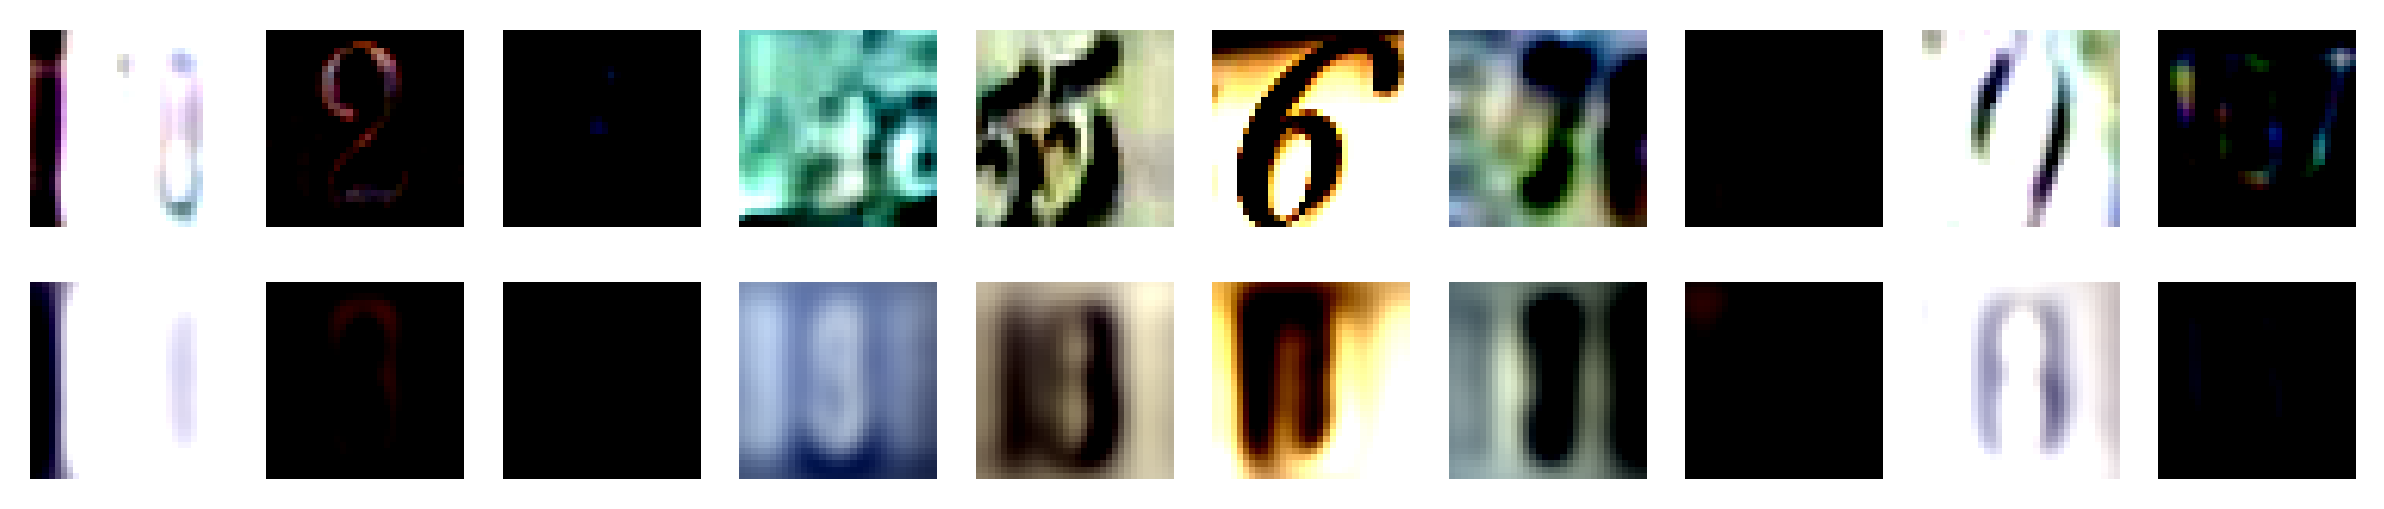

In [41]:
#visualize sample data
figure, axes = plt.subplots(2, 10, figsize = (10, 2), dpi = 300)
for i in range(10):
    axes[0][i].imshow(list_10[i].reshape(32,32,3))
    axes[0][i].set_axis_off()
#plt.suptitle('original images')  

for j in range(10):
    axes[1][j].imshow(recon_img[j].reshape(32,32,3))
    axes[1][j].set_axis_off()
#plt.suptitle('reconstructed images')
plt.show()

### Part c - KNN

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [44]:
test = scipy.io.loadmat("/kaggle/input/svhntestdata/test_32x32.mat")
X_test = test['X']
y_test = test['y']

In [45]:
X_test.shape

(32, 32, 3, 26032)

In [46]:
X_test = np.transpose(X_test, (3,0,1,2))
X_test.shape

(26032, 32, 32, 3)

In [47]:
num_imgs,height,width,channels = X_test.shape
X_test = np.reshape(X_test,(26032,height*width*channels))

In [48]:
from sklearn.preprocessing import StandardScaler

# Assuming train['X'] is a 4D array representing images
# Reshape it to a 2D array before applying StandardScaler
#num_samples, height, width, channels = x.shape
#X_reshaped = train['X'].reshape(num_samples, height * width * channels)

# Apply StandardScaler
scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)

In [49]:
# k-NN on Raw Data (k=5)
knn_raw_5 = KNeighborsClassifier(n_neighbors=5)
knn_raw_5.fit(subset_images, subset_labels)
y_pred_raw_5 = knn_raw_5.predict(X_test)
accuracy_raw_5 = accuracy_score(y_test, y_pred_raw_5)

/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [50]:
accuracy_raw_5

0.41030270436385985

In [51]:
# k-NN on Raw Data (k=7)
knn_raw_7 = KNeighborsClassifier(n_neighbors=7)
knn_raw_7.fit(subset_images, subset_labels)
y_pred_raw_7 = knn_raw_7.predict(X_test)
accuracy_raw_7 = accuracy_score(y_test, y_pred_raw_7)

/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [52]:
accuracy_raw_7

0.4250537799631223

In [53]:
subset_images.shape

(25000, 3072)

In [54]:
# applying pca for tes data
X_test_pca = pca.transform(X_test)

In [55]:
X_test_pca.shape

(26032, 27)

In [56]:
## knn on 27 components after pca
# k-NN on Raw Data (k=5)
knn_pca_5 = KNeighborsClassifier(n_neighbors=5)
knn_pca_5.fit(images_post_pca, subset_labels)
y_pred_pca_5 = knn_pca_5.predict(X_test_pca)
accuracy_pca_5 = accuracy_score(y_test, y_pred_pca_5)

/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [57]:
accuracy_pca_5

0.416679471419791

In [58]:
## knn on 27 components after pca
# k-NN on Raw Data (k=7)
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(images_post_pca, subset_labels)
y_pred_pca_7 = knn.predict(X_test_pca)
accuracy_pca_7 = accuracy_score(y_test, y_pred_pca_7)

/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [59]:
accuracy_pca_7

0.42939459127228025

### knn on 10 components after pca

In [60]:
X_test_pca_10 = pca_recon.transform(X_test)

In [61]:
X_test_pca_10.shape

(26032, 10)

In [62]:
# k-NN on Raw Data (k=5)
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_5.fit(images_for_rec, subset_labels)
y_pred_pca_10_5 = knn_5.predict(X_test_pca_10)
accuracy_pca_10_5 = accuracy_score(y_test, y_pred_pca_10_5)

/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [63]:
accuracy_pca_10_5

0.26655654578979715

In [64]:
# k-NN on Raw Data (k=7)
knn_7 = KNeighborsClassifier(n_neighbors=7)
knn_7.fit(images_for_rec, subset_labels)
y_pred_pca_10_7 = knn_7.predict(X_test_pca_10)
accuracy_pca_10_7 = accuracy_score(y_test, y_pred_pca_10_7)

/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [65]:
accuracy_pca_10_7

0.273240626920713

# Question 2

## Part a , b , c

In [67]:

import seaborn as sns
import sys,os,time

from numpy import exp
from scipy.special import factorial
from scipy.optimize import minimize
from scipy.stats import poisson
import statsmodels.api as sm
import scipy.io
from sklearn.cluster import KMeans

from sklearn.metrics import accuracy_score, confusion_matrix
print("Modules Imported now")

Modules Imported now


In [68]:
mat = scipy.io.loadmat('/kaggle/input/svhndataset/train_32x32.mat')

In [70]:
# Display information about the loaded data
print("Keys in the .mat file:", mat.keys())

# Access a specific variable (e.g., X or y)
# Replace 'X' and 'y' with the actual variable names in your .mat file
X = mat['X']
y = mat['y']

# Print information about the shape and data type of the variables
print("Shape of X:", X.shape)
print("Data type of X:", X.dtype)
print("Shape of y:", y.shape)
print("Data type of y:", y.dtype)

# Additional exploration or analysis based on your specific needs
# For example, you might want to visualize or process 

Keys in the .mat file: dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])
Shape of X: (32, 32, 3, 73257)
Data type of X: uint8
Shape of y: (73257, 1)
Data type of y: uint8


In [71]:
import numpy as np
from sklearn.cluster import KMeans

# Load the .mat file
mat_data = scipy.io.loadmat('/kaggle/input/svhndataset/train_32x32.mat')

# Extract the 'X' variable
X = mat_data['X']

# Reshape the data to make it compatible with KMeans
# The new shape will be (73257, 32*32*3)
X_reshaped = np.reshape(X, (X.shape[0], -1))

# Specify the number of clusters (k=10 in this case)
k = 10

# Perform KMeans clustering
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_reshaped)

# Now 'clusters' contains the cluster assignments for each sample

# Print information about the cluster centers
print("Cluster Centers:")
print(kmeans.cluster_centers_)


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Centers:
[[ 83.          76.25        91.         ... 211.5        209.5
  196.75      ]
 [ 84.75        90.          41.5        ... 204.75       222.25
  192.        ]
 [ 54.          85.          17.33333333 ... 216.66666667 226.
  186.66666667]
 ...
 [ 70.33333333  90.33333333  16.         ... 227.         223.66666667
  185.33333333]
 [ 87.33333333  97.33333333  92.66666667 ... 217.66666667 230.66666667
  192.        ]
 [ 84.5        103.          86.         ... 213.5        204.5
  174.        ]]


In [72]:
subset_images.shape

(25000, 3072)

In [73]:
# Extract the image data (X) and labels (y)
X = np.transpose(mat['X'], (3, 0, 1, 2))  # Transpose to (num_samples, height, width, channels)
X = X.reshape((X.shape[0], -1))  # Flatten the images

In [74]:
X.shape

(73257, 3072)

In [75]:
mat['X'].shape

(32, 32, 3, 73257)

## kmeans on raw data

In [77]:

# Perform K-means clustering
k = 10  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(subset_images)

# # Visualize some images from each cluster (optional)
# plt.figure(figsize=(12, 8))
# for i in range(k):
#     plt.subplot(2, 5, i + 1)
#     cluster_center = kmeans.cluster_centers_[i]
#     cluster_center_img = cluster_center.reshape((32, 32, 3))
#     plt.imshow(cluster_center_img.astype('uint8'))
#     plt.title(f'Cluster {i}')
#     plt.axis('off')

# plt.show()

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [78]:
# sse value
kmeans.inertia_

31531763.739515938

In [79]:
from sklearn import metrics
## rand index and purity of clusters
contingency_matrix = metrics.cluster.contingency_matrix(subset_labels, cluster_labels)
purity = np.sum(np.max(contingency_matrix, axis=0)) / np.sum(contingency_matrix)
purity

0.11824

In [80]:
#cluster_labels = cluster_labels.reshape(25000)
cluster_labels.shape

(25000,)

In [81]:
subset_labels = subset_labels.flatten()
subset_labels.shape

(25000,)

In [82]:
# Calculate Rand index
rand_index = metrics.adjusted_rand_score(subset_labels, cluster_labels)
rand_index

0.0008152928570984803

In [118]:
# Replace 'clusters_27', 'images_post_pca', and 'y' with the actual variable names
clusters = cluster_labels
subset_X = subset_images
y = subset_labels  #  the actual variable name of your original labels

# Reshape subset_X to a 2D array for indexing
reshaped_X = subset_X.reshape((-1, subset_X.shape[-1]))

# Specify the number of clusters (k=5 in this case)
k = 10

# Iterate over each cluster
for cluster_number in range(1,k+1):
    # Find indices of points in the current cluster
    cluster_indices = np.where(clusters == cluster_number)[0]

    # Find corresponding labels from the original y dataset
    cluster_labels_y = y[cluster_indices]

    # Find unique labels in the current cluster
    unique_labels = np.unique(cluster_labels_y)

    # Print the results
    print(f"Cluster {cluster_number} - Indices: {cluster_indices}, Unique Labels: {unique_labels}")


Cluster 1 - Indices: [   13    20    25 ... 24861 24897 24953], Unique Labels: [ 1  2  3  4  5  6  7  8  9 10]
Cluster 2 - Indices: [    2     3    40 ... 24973 24983 24985], Unique Labels: [ 1  2  3  4  5  6  7  8  9 10]
Cluster 3 - Indices: [    0    10    17 ... 24982 24992 24995], Unique Labels: [ 1  2  3  4  5  6  7  8  9 10]
Cluster 4 - Indices: [    6     7     9 ... 24974 24984 24996], Unique Labels: [ 1  2  3  4  5  6  7  8  9 10]
Cluster 5 - Indices: [    1    12    16 ... 24997 24998 24999], Unique Labels: [ 1  2  3  4  5  6  7  8  9 10]
Cluster 6 - Indices: [   19    21    29 ... 24958 24959 24993], Unique Labels: [ 1  2  3  4  5  6  7  8  9 10]
Cluster 7 - Indices: [    5     8    18 ... 24976 24980 24981], Unique Labels: [ 1  2  3  4  5  6  7  8  9 10]
Cluster 8 - Indices: [    4    14    15 ... 24940 24990 24994], Unique Labels: [ 1  2  3  4  5  6  7  8  9 10]
Cluster 9 - Indices: [   11    24    71 ... 24971 24978 24987], Unique Labels: [ 1  2  3  4  5  6  7  8  9 10]
C

We observe that all the label images are present in all the clusters when we have used raw data (2500 images from each label) 

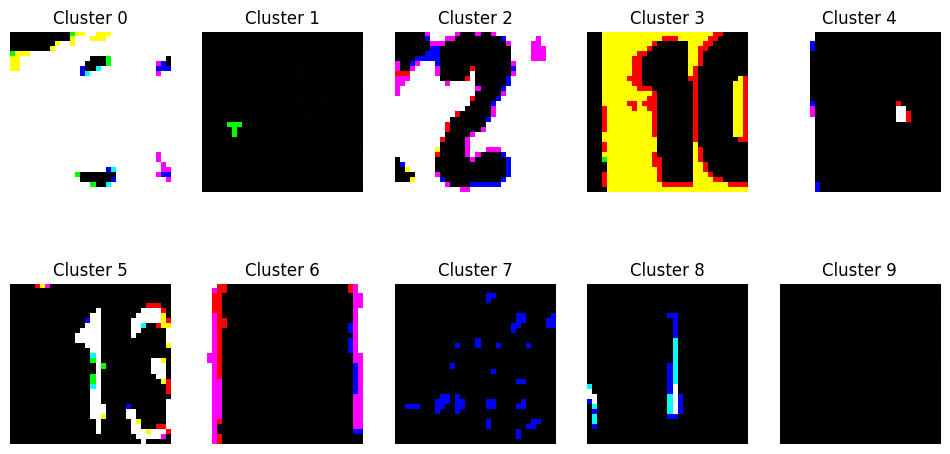

In [84]:
closest_indices = [np.argmin(np.linalg.norm(subset_images[cluster_labels == i] - kmeans.cluster_centers_[i], axis=1)) for i in range(k)]

# Display the images closest to each centroid
plt.figure(figsize=(12, 6))
for i, index in enumerate(closest_indices):
    plt.subplot(2, 5, i + 1)
    closest_image = subset_images[index].reshape((32, 32, 3))
    plt.imshow(closest_image.astype('uint8'))
    plt.title(f'Cluster {i}')
    plt.axis('off')

plt.show()

In [85]:
import numpy as np
from scipy.io import loadmat
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix


# Extract the image data (X) and labels (y)
#X = np.transpose(mat['X'], (3, 0, 1, 2))
#X = X.reshape((X.shape[0], -1))
y_true = subset_labels.flatten()

# Perform K-means clustering
k = 10
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(subset_images)

# Adjust cluster labels to match the range of true class labels
cluster_labels += 1  # Increment each label by 1

# Evaluate clustering performance using accuracy and confusion matrix
accuracy = accuracy_score(y_true, cluster_labels)
conf_matrix = confusion_matrix(y_true, cluster_labels)

print(f"Accuracy of clustering: {accuracy:.2%}")
print("Confusion Matrix:")
print(conf_matrix)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Accuracy of clustering: 9.69%
Confusion Matrix:
[[335 243 320 325 142 232  90 307 297 209]
 [332 262 355 269 143 199  89 373 314 164]
 [329 244 323 281 148 233  73 376 322 171]
 [319 230 364 282 152 232 108 370 329 114]
 [316 262 379 279 134 227  85 369 351  98]
 [309 251 357 266 131 226 140 389 337  94]
 [333 265 375 306 123 220 140 362 291  85]
 [303 269 379 263 119 262 113 392 313  87]
 [416 222 361 264 127 251  93 397 288  81]
 [300 240 373 251 130 298 160 384 324  40]]


## k means with27 components

In [86]:
subset_images.shape

(25000, 3072)

In [119]:
# Load the .mat file
#mat_data = scipy.io.loadmat('/kaggle/input/svhntrain-test/train_32x32.mat')

# Extract the 'X' variable
#X = mat_data['X']

# Reshape the data to make it compatible with KMeans
# The new shape will be (73257, 32*32*3)
#X_reshaped = np.reshape(X, (X.shape[0], -1))

# Specify the number of clusters (k=10 in this case)
k = 10

# Perform KMeans clustering
kmeans_27 = KMeans(n_clusters=k, random_state=42)
clusters_27 = kmeans_27.fit_predict(images_post_pca)

# Now 'clusters' contains the cluster assignments for each sample

# # Print information about the cluster centers
# print("Cluster Centers:")
# print(kmeans_27.cluster_centers_)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [122]:
clusters = clusters_27
subset_X = images_post_pca
y = subset_labels  #  the actual variable name of your original labels

# Reshape subset_X to a 2D array for indexing
reshaped_X = subset_X.reshape((-1, subset_X.shape[-1]))

# Specify the number of clusters (k=5 in this case)
k = 10

# Iterate over each cluster
for cluster_number in range(0,k):
    # Find indices of points in the current cluster
    cluster_indices = np.where(clusters == cluster_number)[0]

    # Find corresponding labels from the original y dataset
    cluster_labels_y = y[cluster_indices]

    # Find unique labels in the current cluster
    unique_labels = np.unique(cluster_labels_y)

    # Print the results
    print(f"Cluster {cluster_number+1} - Indices: {cluster_indices}, Unique Labels: {unique_labels}")


Cluster 1 - Indices: [    2     3    40 ... 24973 24983 24985], Unique Labels: [ 1  2  3  4  5  6  7  8  9 10]
Cluster 2 - Indices: [   13    20    25 ... 24861 24897 24953], Unique Labels: [ 1  2  3  4  5  6  7  8  9 10]
Cluster 3 - Indices: [    0    10    17 ... 24982 24992 24995], Unique Labels: [ 1  2  3  4  5  6  7  8  9 10]
Cluster 4 - Indices: [   22    23    50 ... 24972 24977 24991], Unique Labels: [ 1  2  3  4  5  6  7  8  9 10]
Cluster 5 - Indices: [    4    14    15 ... 24971 24990 24994], Unique Labels: [ 1  2  3  4  5  6  7  8  9 10]
Cluster 6 - Indices: [   11    24    71 ... 24970 24978 24987], Unique Labels: [ 1  2  3  4  5  6  7  8  9 10]
Cluster 7 - Indices: [   19    21    29 ... 24958 24959 24993], Unique Labels: [ 1  2  3  4  5  6  7  8  9 10]
Cluster 8 - Indices: [    5     8    18 ... 24976 24980 24981], Unique Labels: [ 1  2  3  4  5  6  7  8  9 10]
Cluster 9 - Indices: [    6     7     9 ... 24974 24984 24996], Unique Labels: [ 1  2  3  4  5  6  7  8  9 10]
C

We observe that all the label images are present in all the clusters 

In [88]:
## sse
# sse value
kmeans_27.inertia_

24004248.02597428

In [89]:
cluster_labels = clusters_27

In [90]:
from sklearn import metrics
## rand index and purity of clusters
contingency_matrix = metrics.cluster.contingency_matrix(subset_labels, cluster_labels)
purity = np.sum(np.max(contingency_matrix, axis=0)) / np.sum(contingency_matrix)
purity

0.11808

In [91]:
# Calculate Rand index
rand_index = metrics.adjusted_rand_score(subset_labels, cluster_labels)
rand_index

0.0007996282545518812

In [92]:
kmeans.cluster_centers_.shape

(10, 3072)

In [93]:
images_post_pca.shape

(25000, 27)

In [94]:
cluster_labels = clusters_27

#### 27 components

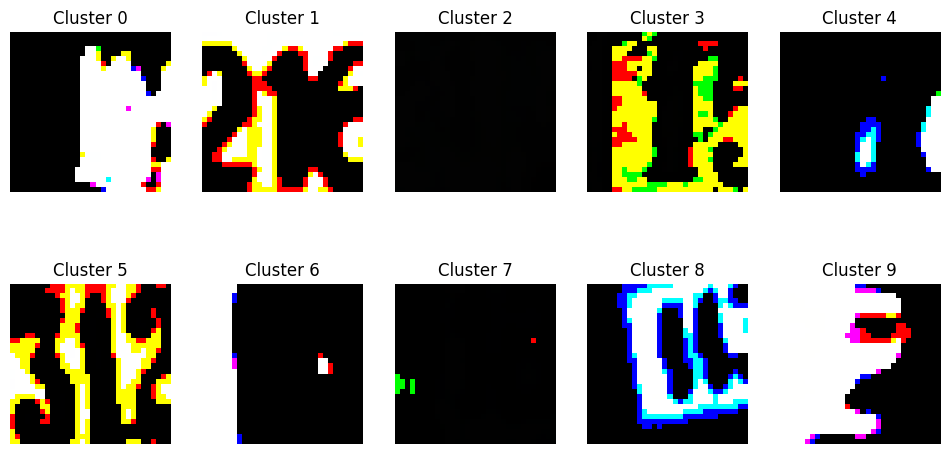

In [95]:
closest_indices = [np.argmin(np.linalg.norm(images_post_pca[cluster_labels == i] - kmeans_27.cluster_centers_[i], axis=1)) for i in range(k)]

# Display the images closest to each centroid
plt.figure(figsize=(12, 6))
for i, index in enumerate(closest_indices):
    plt.subplot(2, 5, i + 1)
    closest_image = subset_images[index].reshape(32,32,3)
    plt.imshow(closest_image.astype('uint8'))
    plt.title(f'Cluster {i}')
    plt.axis('off')

plt.show()

In [96]:
## sse


In [97]:

from sklearn.metrics import accuracy_score, confusion_matrix

# Extract the image data (X) and labels (y)
#X = np.transpose(mat['X'], (3, 0, 1, 2))
#X = X.reshape((X.shape[0], -1))
y_true = subset_labels.flatten()

# Perform K-means clustering
# k = 10
# kmeans = KMeans(n_clusters=k, random_state=42)
# cluster_labels = kmeans.fit_predict(subset_images)

# Adjust cluster labels to match the range of true class labels
cluster_labels += 1  # Increment each label by 1

# Evaluate clustering performance using accuracy and confusion matrix
accuracy = accuracy_score(y_true, cluster_labels)
conf_matrix = confusion_matrix(y_true, cluster_labels)

print(f"Accuracy of clustering: {accuracy:.2%}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy of clustering: 10.32%
Confusion Matrix:
[[293 209 334 224 243  90 142 318 325 322]
 [314 164 327 185 267  88 144 386 266 359]
 [323 166 329 230 244  74 149 383 278 324]
 [329 116 313 234 228 108 153 377 282 360]
 [347  96 315 223 267  83 136 379 279 375]
 [335  91 308 223 255 139 131 390 265 363]
 [291  91 334 207 266 140 123 368 304 376]
 [309  86 301 262 269 113 121 397 263 379]
 [288  82 411 250 225  95 127 403 261 358]
 [324  46 294 297 243 159 130 384 250 373]]


## kmeans with 10 comps

In [98]:
# Specify the number of clusters (k=10 in this case)
k = 10

# Perform KMeans clustering
kmeans_10 = KMeans(n_clusters=k, random_state=42)
clusters_10 = kmeans_10.fit_predict(images_for_rec)

# Now 'clusters' contains the cluster assignments for each sample

# Print information about the cluster centers
print("Cluster Centers:")
print(kmeans_10.cluster_centers_)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Centers:
[[ 1.67296964e+01 -4.23747047e-02  2.23440066e+01 -8.73246998e+00
   5.63883810e-02 -3.97881511e-01  1.02755167e+00 -7.19072172e-01
  -7.89703082e-01  7.73179922e-01]
 [-3.38436546e+01 -7.29348599e+00 -6.52489738e+00 -2.02325928e+00
   2.03485229e+00 -1.32007037e-01 -7.41875684e-02 -1.10863035e-01
  -3.16421711e-01  2.57056721e-02]
 [-2.86007176e+01  9.10944590e+00  8.28741505e+00  5.14244610e+00
  -1.37191206e+00  1.49983178e-01 -3.82303146e-01 -2.21766426e-02
   8.10584666e-02 -3.07484694e-01]
 [-5.98179323e+01  2.04736708e+00  1.03254057e+00 -1.08924073e+00
   5.15631047e-01  1.73111715e-01  2.66939178e-01  1.94256370e-01
   2.94874959e-01 -5.07744585e-02]
 [ 2.33663589e+01 -6.19364689e+00 -4.86134020e+00  1.65001955e+00
  -1.06304972e+00  3.90414461e-01 -6.11260909e-01  8.37244399e-02
   1.68732191e-01  5.23538411e-02]
 [ 9.62512804e+01  2.43099013e+00  7.05067507e-01  1.51952140e+00
   2.71802938e+00 -2.52317087e-02 -6.62307420e-03  1.13246823e-01
  -4.23769961e-0

In [124]:
clusters = clusters_10
subset_X = images_for_rec
y = subset_labels  #  the actual variable name of your original labels

# Reshape subset_X to a 2D array for indexing
reshaped_X = subset_X.reshape((-1, subset_X.shape[-1]))

# Specify the number of clusters (k=5 in this case)
k = 10

# Iterate over each cluster
for cluster_number in range(1,k+1):
    # Find indices of points in the current cluster
    cluster_indices = np.where(clusters == cluster_number)[0]

    # Find corresponding labels from the original y dataset
    cluster_labels_y = y[cluster_indices]

    # Find unique labels in the current cluster
    unique_labels = np.unique(cluster_labels_y)

    # Print the results
    print(f"Cluster {cluster_number} - Indices: {cluster_indices}, Unique Labels: {unique_labels}")


Cluster 1 - Indices: [   13    20    25 ... 24861 24897 24953], Unique Labels: [ 1  2  3  4  5  6  7  8  9 10]
Cluster 2 - Indices: [    2     3    40 ... 24973 24983 24985], Unique Labels: [ 1  2  3  4  5  6  7  8  9 10]
Cluster 3 - Indices: [    0    10    17 ... 24982 24992 24995], Unique Labels: [ 1  2  3  4  5  6  7  8  9 10]
Cluster 4 - Indices: [    6     7     9 ... 24974 24984 24996], Unique Labels: [ 1  2  3  4  5  6  7  8  9 10]
Cluster 5 - Indices: [    1    12    16 ... 24997 24998 24999], Unique Labels: [ 1  2  3  4  5  6  7  8  9 10]
Cluster 6 - Indices: [   19    21    29 ... 24958 24959 24993], Unique Labels: [ 1  2  3  4  5  6  7  8  9 10]
Cluster 7 - Indices: [    5     8    18 ... 24976 24980 24981], Unique Labels: [ 1  2  3  4  5  6  7  8  9 10]
Cluster 8 - Indices: [    4    14    15 ... 24940 24990 24994], Unique Labels: [ 1  2  3  4  5  6  7  8  9 10]
Cluster 9 - Indices: [   11    24    71 ... 24971 24978 24987], Unique Labels: [ 1  2  3  4  5  6  7  8  9 10]
C

We observe that all the clusters have all the label images .

In [99]:
## sse
# sse value
kmeans_10.inertia_

17729374.23133571

In [100]:
cluster_labels = clusters_10

In [101]:
cluster_labels.shape

(25000,)

In [102]:
from sklearn import metrics
## rand index and purity of clusters
contingency_matrix = metrics.cluster.contingency_matrix(subset_labels, cluster_labels)
purity = np.sum(np.max(contingency_matrix, axis=0)) / np.sum(contingency_matrix)
purity

0.11628

In [103]:
# Calculate Rand index
rand_index = metrics.adjusted_rand_score(subset_labels, cluster_labels)
rand_index

0.0006523314308485889

In [104]:
kmeans_10.cluster_centers_.shape

(10, 10)

In [105]:
cluster_labels = clusters_10

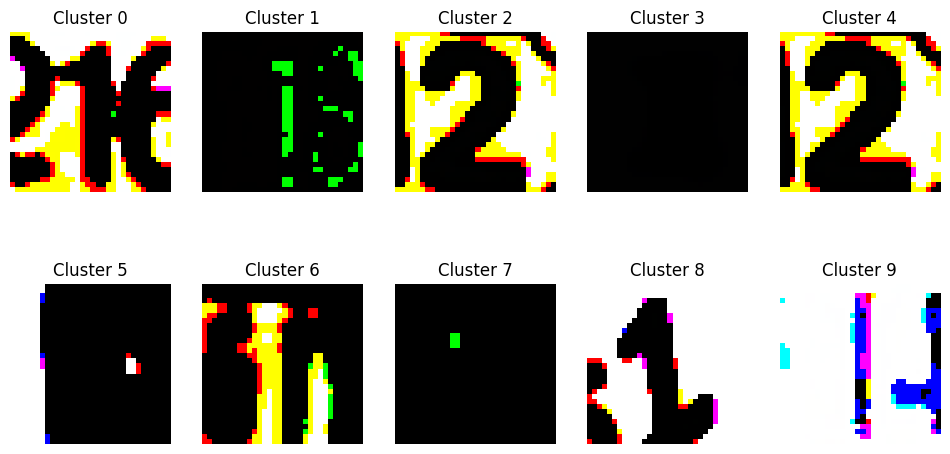

In [106]:
closest_indices = [np.argmin(np.linalg.norm(images_for_rec[cluster_labels == i] - kmeans_10.cluster_centers_[i], axis=1)) for i in range(k)]

# Display the images closest to each centroid
plt.figure(figsize=(12, 6))
for i, index in enumerate(closest_indices):
    plt.subplot(2, 5, i + 1)
    closest_image = subset_images[index].reshape(32,32,3)
    plt.imshow(closest_image.astype('uint8'))
    plt.title(f'Cluster {i}')
    plt.axis('off')

plt.show()

In [107]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Extract the image data (X) and labels (y)
#X = np.transpose(mat['X'], (3, 0, 1, 2))
#X = X.reshape((X.shape[0], -1))
y_true = subset_labels.flatten()

# Perform K-means clustering
# k = 10
# kmeans = KMeans(n_clusters=k, random_state=42)
# cluster_labels = kmeans.fit_predict(subset_images)

# Adjust cluster labels to match the range of true class labels
cluster_labels += 1  # Increment each label by 1

# Evaluate clustering performance using accuracy and confusion matrix
accuracy = accuracy_score(y_true, cluster_labels)
conf_matrix = confusion_matrix(y_true, cluster_labels)

print(f"Accuracy of clustering: {accuracy:.2%}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy of clustering: 10.39%
Confusion Matrix:
[[200 307 341 331 313 139 278 240  97 254]
 [155 326 329 283 348 140 349 253 103 214]
 [173 331 325 300 320 148 351 229  80 243]
 [130 338 330 291 353 149 342 228 108 231]
 [ 96 352 321 293 366 133 338 253  88 260]
 [ 94 342 326 279 352 127 369 248 145 218]
 [ 87 306 326 320 371 121 336 256 138 239]
 [105 317 326 279 379 119 373 249 122 231]
 [ 93 295 418 283 360 123 382 212  95 239]
 [ 53 334 312 259 370 128 380 224 158 282]]


Ans 2 c) In part 1c we observed that accuracy for KNN with k=5 0.416679471419791 which is 41.66% and here with Kmeans clustring with k=5 we got accuracy as 10.39%. Here for both we have used the images which are post PCA 

## Part d

In [108]:
# Specify the number of clusters (k=10 in this case)
k = 5

# Perform KMeans clustering
kmeans_27_k5 = KMeans(n_clusters=k, random_state=42)
clusters_27 = kmeans_27_k5.fit_predict(images_post_pca)

# Now 'clusters' contains the cluster assignments for each sample

# Print information about the cluster centers
print("Cluster Centers:")
print(kmeans_27_k5.cluster_centers_)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Centers:
[[ 6.54090716e+00 -3.05329173e+00 -1.28806143e+00 -8.38591286e-01
  -4.21362096e-01  2.44268560e-01 -1.19762786e-01 -1.46159970e-01
  -8.46775432e-02  1.88253101e-01 -2.32556993e-01  1.78988786e-01
   4.50351073e-02 -9.16211098e-04  3.61134303e-02  5.91709871e-02
   9.53104647e-02  2.30812784e-02 -9.38869734e-02  6.35193842e-02
   2.01869185e-03 -1.40853484e-03 -1.13038294e-01 -1.30746207e-01
   3.71316696e-02 -4.60431633e-02  4.78874356e-02]
 [ 8.67892269e+01  1.56364256e+00  1.76216142e+00  1.56150031e+00
   2.00277257e+00  2.40809735e-01  2.29988503e-01 -1.02917318e-02
   1.15161133e-01 -2.27446017e-01  5.07660447e-01 -3.17903234e-01
  -1.16664912e-01  1.11596178e-01  1.15265309e-02 -9.25606931e-02
  -1.18075791e-01 -5.32125965e-02  1.29892992e-01 -1.00960978e-01
   5.19719712e-02 -8.75899540e-02  3.48953601e-01  2.24982552e-01
  -1.04898389e-01 -1.88773236e-01  4.90743212e-02]
 [ 4.07504224e+01  1.10432530e+00 -3.63969826e-01 -1.11275605e+00
  -9.22560294e-01 -2.54

Sum Squared error

In [109]:
kmeans_27_k5.inertia_

27874511.11376427

In [111]:
import numpy as np
from sklearn.cluster import KMeans


# Replace 'clusters_27', 'images_post_pca', and 'y' with the actual variable names
clusters = clusters_27
subset_X = images_post_pca
y = subset_labels  #  the actual variable name of your original labels

# Reshape subset_X to a 2D array for indexing
reshaped_X = subset_X.reshape((-1, subset_X.shape[-1]))

# Specify the number of clusters (k=5 in this case)
k = 5

# Iterate over each cluster
for cluster_number in range(k):
    # Find indices of points in the current cluster
    cluster_indices = np.where(clusters == cluster_number)[0]

    # Find corresponding labels from the original y dataset
    cluster_labels_y = y[cluster_indices]

    # Find unique labels in the current cluster
    unique_labels = np.unique(cluster_labels_y)

    # Print the results
    print(f"Cluster {cluster_number + 1} - Indices: {cluster_indices}, Unique Labels: {unique_labels}")


Cluster 1 - Indices: [    1     8    12 ... 24986 24998 24999], Unique Labels: [ 1  2  3  4  5  6  7  8  9 10]
Cluster 2 - Indices: [   19    21    29 ... 24959 24993 24994], Unique Labels: [ 1  2  3  4  5  6  7  8  9 10]
Cluster 3 - Indices: [    4    11    13 ... 24989 24990 24997], Unique Labels: [ 1  2  3  4  5  6  7  8  9 10]
Cluster 4 - Indices: [    6     7     9 ... 24984 24995 24996], Unique Labels: [ 1  2  3  4  5  6  7  8  9 10]
Cluster 5 - Indices: [    0     2     3 ... 24985 24991 24992], Unique Labels: [ 1  2  3  4  5  6  7  8  9 10]


So we observe that all the clusters have all the labels .